### Plots for Casc 

21/08/2022


#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import os
import sys

In [5]:
import pandas as pd
sys.path.append('/home/ademin/reduce3/reduce-algebra-code/generic/rbench')

In [6]:
import rbench as rb

### Loading data

In [39]:
f5 = rb.read_filetree('./f5-full', 'f5').select('boot').deselect(['heapsize', 'valid'])
groebner = rb.read_filetree('./groebner-full', 'groebner').select('boot').deselect(['heapsize', 'valid'])

In [40]:
combo = groebner.join(f5, how='inner')

In [41]:
combo005 = combo.slow(0.05)

### Plots

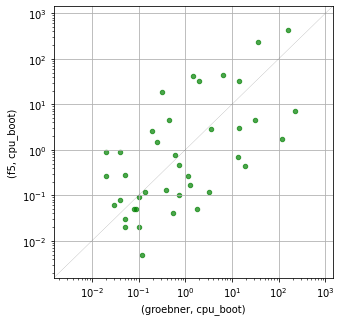

In [43]:
x = combo005.plot.scatter(
    x=('groebner', 'cpu_boot'), 
    y=('f5', 'cpu_boot'), 
    color='g', 
    alpha=0.7
)

In [13]:
f = x.get_figure()
f.savefig("wuwu.png")